In [33]:
import learn as learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from config import *
from sklearn.model_selection import train_test_split

# Данные

In [34]:
data = pd.read_csv('./data.csv')
for column in COLUMNS.keys():
    print(f'Null percentage in {column}: {data[column].isnull().sum() / data[column].size * 100}')

Null percentage in price: 0.0
Null percentage in year: 0.0
Null percentage in origin: 0.0
Null percentage in firstCirculationDate: 0.0
Null percentage in technicalControl: 0.0
Null percentage in firstHand: 0.0
Null percentage in mileage: 0.0
Null percentage in energy: 0.0
Null percentage in gearbox: 0.0
Null percentage in externalColor: 0.0
Null percentage in doors: 0.4419191919191919
Null percentage in seats: 10.984848484848484
Null percentage in length: 12.626262626262626
Null percentage in trunkVolumeRange: 19.696969696969695
Null percentage in consumption: 28.78787878787879
Null percentage in co2: 18.434343434343432


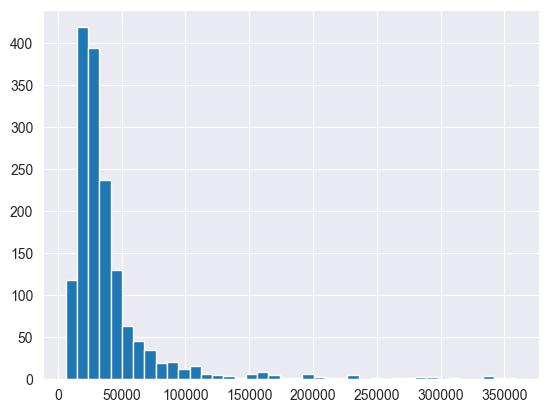

In [35]:
data.price.hist(bins=40)
plt.show()

# выбросы
data = data[data.price < 150000]

In [36]:
for column in COLUMNS.keys():
    uniqueValues = data[column].unique()
    if len(uniqueValues) <= 15:
        print(f'Unique values of {column}: {uniqueValues}')
    else:
        print(f'Too many unique values of "{column}": {len(uniqueValues)}')

Too many unique values of "price": 1167
Too many unique values of "year": 31
Unique values of origin: ['Importé' 'France']
Too many unique values of "firstCirculationDate": 1211
Unique values of technicalControl: ['Requis' 'Non requis']
Unique values of firstHand: ['Non' 'Oui']
Too many unique values of "mileage": 1408
Unique values of energy: ['Hybride essence électrique' 'Essence' 'Diesel' 'Electrique'
 'Hybride diesel électrique' 'Bicarburation essence bioéthanol'
 'Bicarburation essence GPL' 'Bicarburation essence GNV']
Unique values of gearbox: ['Automatique' 'Manuelle']
Too many unique values of "externalColor": 155
Unique values of doors: [ 5.  2.  4.  3. nan]
Unique values of seats: [ 5.  4. nan  7.  3.  2.  8.  6. 11.  9. 65.]
Too many unique values of "length": 152
Unique values of trunkVolumeRange: ['Moyen Coffre' 'Petit coffre' nan 'Grand coffre']
Too many unique values of "consumption": 84
Too many unique values of "co2": 168


In [37]:
def boxplot(data: dict):
    all_data = [data[type] for type in data]
    labels = [type for type in data]
    plt.figure(figsize=(10, 9))
    plt.boxplot(all_data,
                vert=True,
                labels=labels
                )
    plt.show()

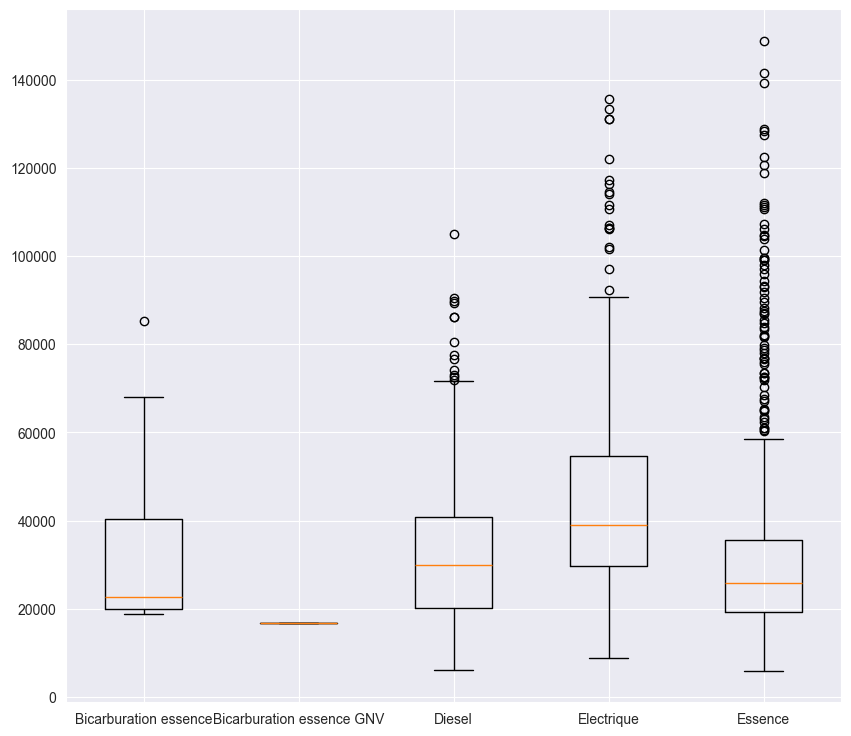

<Axes: >

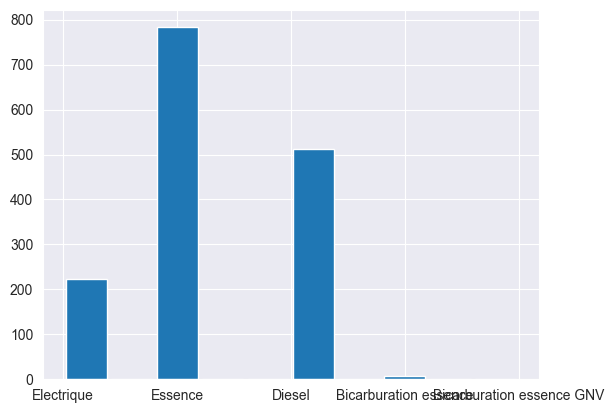

In [38]:
data = data.assign(simple_energy=data['energy'].replace(['Hybride essence électrique', 'Hybride diesel électrique'], 'Electrique').replace(['Bicarburation essence bioéthanol', 'Bicarburation essence GPL'], 'Bicarburation essence'))
boxplot(data[["simple_energy", 'price']].groupby("simple_energy")['price'].apply(list).to_dict())
data['simple_energy'].hist(rwidth=0.9)

In [39]:
# Убираем крайние случае и будет классифицировать по типу энергии
data = data[
    (data['simple_energy'] == 'Electrique') |
    (data['simple_energy'] == 'Essence') |
    (data['simple_energy'] == 'Diesel')
]
data

,Unnamed: 0,price,year,origin,firstCirculationDate,technicalControl,firstHand,mileage,energy,gearbox,externalColor,doors,seats,length,trunkVolumeRange,consumption,co2,simple_energy
0,0,78090,2019,Importé,28/10/2019,Requis,Non,55824,Hybride essence électrique,Automatique,gris metal,5.0,5.0,4.88,Moyen Coffre,NaN,NaN,Electrique
1,1,22040,2021,France,11/05/2021,Non requis,Oui,7924,Essence,Manuelle,blanc,5.0,5.0,4.10,Petit coffre,6.0,136.0,Essence
2,2,59500,2023,France,12/01/2024,Non requis,Oui,43192,Hybride essence électrique,Automatique,gris foncé,5.0,5.0,4.71,Moyen Coffre,NaN,NaN,Electrique
3,3,148800,2018,France,05/12/2018,Requis,Non,54000,Essence,Automatique,noir,2.0,4.0,4.50,Petit coffre,6.6,180.0,Essence
4,4,37170,2020,Importé,14/04/2020,Non requis,Oui,45585,Diesel,Automatique,gris foncé,5.0,NaN,NaN,NaN,NaN,131.0,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,1579,30370,2017,France,26/11/2017,Requis,Non,175070,Diesel,Automatique,noir verni,4.0,5.0,5.27,NaN,7.3,229.0,Diesel
1580,1580,22080,2021,France,28/08/2021,Non requis,Oui,73926,Essence,Manuelle,rouge,5.0,5.0,4.19,Moyen Coffre,4.2,96.0,Essence
1581,1581,58300,2015,Importé,16/11/2015,Requis,Oui,12744,Essence,Automatique,vert foncé metal,3.0,2.0,4.47,Moyen Coffre,8.4,199.0,Essence
1582,1582,40230,2023,Importé,01/10/2023,Non requis,Non,12,Diesel,Manuelle,blanc,5.0,5.0,4.45,Moyen Coffre,5.0,131.0,Diesel


In [40]:
def change_energy_to_class(x):
    if x == 'Electrique':
        return 0
    elif x == 'Essence':
        return 1
    else:
        return 2

data = data.assign(
    # seats_5=data.seats.apply(lambda x: x == 5),
    # doors_5=data.doors.apply(lambda x: x == 5),
    automatic=data.gearbox.apply(lambda x: x == 'Automatique'),
    # is_import=data.origin.apply(lambda x: x == 'Importé'),
    # is_petit=data.trunkVolumeRange.apply(lambda x: x == 'Petit coffre'),
    lengthxconsumption=data.consumption*data.length,
    # is_electric=data.energy.apply(lambda x: x == 'Electrique')
    energy_class=data.simple_energy.apply(change_energy_to_class)
)

def change_nan_to_mode(column):
    global data
    data[column] = data[column].fillna(data[column].mode()[0])

useful_columns = [
    'mileage',
    'doors',
    'length',
    'consumption',
    'automatic',
    'co2',
    'lengthxconsumption',
    'price',
    'energy_class'
]

[change_nan_to_mode(column) for column in useful_columns]

useful_data = data[useful_columns]

useful_data

,mileage,doors,length,consumption,automatic,co2,lengthxconsumption,price,energy_class
0,55824,5.0,4.88,5.3,True,119.0,21.518,78090,0
1,7924,5.0,4.10,6.0,False,136.0,24.600,22040,1
2,43192,5.0,4.71,5.3,True,119.0,21.518,59500,0
3,54000,2.0,4.50,6.6,True,180.0,29.700,148800,1
4,45585,5.0,4.45,5.3,True,131.0,21.518,37170,2
...,...,...,...,...,...,...,...,...,...
1579,175070,4.0,5.27,7.3,True,229.0,38.471,30370,2
1580,73926,5.0,4.19,4.2,False,96.0,17.598,22080,1
1581,12744,3.0,4.47,8.4,True,199.0,37.548,58300,1
1582,12,5.0,4.45,5.0,False,131.0,22.250,40230,2


In [41]:
def make_xy(data: pd.DataFrame):
    x = data.drop('energy_class', axis=1)
    y = data['energy_class'].to_numpy()
    return x, y

def normalize(x):
    means = x.mean(axis=0)
    scales = np.sqrt(x.var(axis=0))
    x -= means
    x /= scales
    return x, means, scales

In [42]:
train, test = train_test_split(useful_data,
                               test_size=0.2,
                               random_state=42)
train, valid = train_test_split(train, test_size=0.2, random_state=42)

x_train, y_train = make_xy(train)
x_valid, y_valid = make_xy(valid)
x_test, y_test = make_xy(test)

x_train, _, _ = normalize(x_train)
x_valid, _, _ = normalize(x_valid)
x_test, _, _ = normalize(x_test)

In [43]:
y_train

array([1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 1,
       1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2,
       1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1,
       1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 0, 2, 0,
       0, 0, 1, 0, 2, 2, 1, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 2, 1, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1,

In [44]:
from sklearn.metrics import accuracy_score

def accuracy(y_preds, y_expected):
    return accuracy_score(y_expected, y_preds) * 100

accuracy(y_train, y_train)

100.0

In [45]:
from knn import KNNClassifier

In [46]:
my_knn_model = KNNClassifier(k = 3)
my_knn_model.fit(x_train, y_train)

accuracy(my_knn_model.predict(x_test), y_test)

81.57894736842105

In [47]:
from sklearn.neighbors import KNeighborsClassifier

def mape(pred: np.ndarray, trueth: np.ndarray) -> np.ndarray:
    # mean_absolute_percentage_error with clipping huge values
    err = np.array(abs(pred - trueth) / trueth)
    err[err > 20] = 20 # clip 2000% error
    return err

knn_model = KNeighborsClassifier(n_neighbors=3)

In [48]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
# Baseline
print(f'All 0: {accuracy(len(x_test) * [0], y_test)}')
print(f'All 1: {accuracy(len(x_test) * [1], y_test)}')
print(f'All 2: {accuracy(len(x_test) * [2], y_test)}')

All 0: 12.5
All 1: 54.93421052631579
All 2: 32.56578947368421


In [50]:
accuracy(knn_model.predict(x_test), y_test)

81.25

In [51]:
from sklearn.neighbors import BallTree

BallTree.valid_metrics

['euclidean',
 'l2',
 'minkowski',
 'p',
 'manhattan',
 'cityblock',
 'l1',
 'chebyshev',
 'infinity',
 'seuclidean',
 'mahalanobis',
 'hamming',
 'canberra',
 'braycurtis',
 'jaccard',
 'dice',
 'rogerstanimoto',
 'russellrao',
 'sokalmichener',
 'sokalsneath',
 'haversine',
 'pyfunc']

In [52]:
import optuna

In [62]:
def my_objective(window_type, trial):
    k = trial.suggest_int("k", 1, 100)
    if window_type == 'fixed':
        window_param = trial.suggest_float("window_param", 0.01, 1)
    else:
        window_param = None
    kernel = trial.suggest_categorical("kernel", ["uniform", "triangular", "epanechnikov", "gaussian"])
    metric = trial.suggest_categorical("metric", ["manhattan", "euclidean", "cosine"])
    predictions = KNNClassifier(
        k=k,
        window_type=window_type,
        window_param=window_param,
        kernel=kernel,
        metric=metric).fit(x_train, y_train).predict(x_valid)
    return accuracy(y_valid, predictions)


my_objective_fixed = lambda trial: my_objective('fixed', trial)
my_objective_variable = lambda trial: my_objective('non_fixed', trial)

study = optuna.create_study(direction="maximize")
study.optimize(my_objective_variable, n_trials=100)
best_fixed = study.best_trial

[I 2024-03-25 20:07:27,418] A new study created in memory with name: no-name-00829b5b-b6f4-4999-9e45-a76fc09f3e3e
[I 2024-03-25 20:07:27,434] Trial 0 finished with value: 79.42386831275721 and parameters: {'k': 22, 'kernel': 'triangular', 'metric': 'manhattan'}. Best is trial 0 with value: 79.42386831275721.
[I 2024-03-25 20:07:27,449] Trial 1 finished with value: 74.48559670781893 and parameters: {'k': 11, 'kernel': 'gaussian', 'metric': 'euclidean'}. Best is trial 0 with value: 79.42386831275721.
[I 2024-03-25 20:07:27,465] Trial 2 finished with value: 82.71604938271605 and parameters: {'k': 7, 'kernel': 'triangular', 'metric': 'manhattan'}. Best is trial 2 with value: 82.71604938271605.
[I 2024-03-25 20:07:28,694] Trial 3 finished with value: 75.7201646090535 and parameters: {'k': 68, 'kernel': 'uniform', 'metric': 'manhattan'}. Best is trial 2 with value: 82.71604938271605.
[I 2024-03-25 20:07:28,725] Trial 4 finished with value: 78.60082304526749 and parameters: {'k': 59, 'kernel'

In [63]:
print(best_fixed.params)

{'k': 5, 'kernel': 'triangular', 'metric': 'manhattan'}


In [55]:
def lib_objective(trial):
    n_neighbors = trial.suggest_int("k", 1, 200)
    weights = trial.suggest_categorical("Weight function", ["uniform", "distance"])
    algorithm = trial.suggest_categorical("NN Algorithm", ["ball_tree", "kd_tree", "brute"])
    p = trial.suggest_float("Minkowski degree", 1, 5)
    predictions = KNeighborsClassifier(
        n_neighbors,
        weights=weights,
        algorithm=algorithm,
        p=p).fit(x_train, y_train).predict(x_valid)
    return accuracy(y_valid, predictions)


lib_objective_fixed = lambda trial: lib_objective(trial)
lib_objective_variable = lambda trial: lib_objective(trial)

study = optuna.create_study(direction="maximize")
study.optimize(lib_objective, n_trials=50)

[I 2024-03-25 20:06:40,447] A new study created in memory with name: no-name-b3a0e8f9-0741-451a-b52b-10f9471dcebc
[I 2024-03-25 20:06:40,493] Trial 0 finished with value: 76.95473251028807 and parameters: {'k': 13, 'Weight function': 'uniform', 'NN Algorithm': 'kd_tree', 'Minkowski degree': 1.4725360211700873}. Best is trial 0 with value: 76.95473251028807.
[I 2024-03-25 20:06:40,572] Trial 1 finished with value: 62.55144032921811 and parameters: {'k': 172, 'Weight function': 'uniform', 'NN Algorithm': 'kd_tree', 'Minkowski degree': 4.655802200208374}. Best is trial 0 with value: 76.95473251028807.
[I 2024-03-25 20:06:40,650] Trial 2 finished with value: 74.48559670781893 and parameters: {'k': 164, 'Weight function': 'distance', 'NN Algorithm': 'ball_tree', 'Minkowski degree': 1.713322406160806}. Best is trial 0 with value: 76.95473251028807.
[I 2024-03-25 20:06:40,712] Trial 3 finished with value: 72.8395061728395 and parameters: {'k': 132, 'Weight function': 'distance', 'NN Algorithm

In [56]:
print(study.best_trial.params)

{'k': 4, 'Weight function': 'distance', 'NN Algorithm': 'ball_tree', 'Minkowski degree': 1.3637172003856228}


In [57]:
def my_acc_dep_on_k(k, x, y):
    preds = KNNClassifier(
        k=k,
        window_type='non_fixed',
        metric='manhattan',
        kernel='triangular')\
        .fit(x_train, y_train)\
        .predict(x)
    return accuracy(preds, y)

def lib_acc_dep_on_k(k, x, y):
    preds = KNeighborsClassifier(
        k,
        weights='distance',
        metric='manhattan',
        algorithm='brute')\
        .fit(x_train, y_train)\
        .predict(x)
    return accuracy(preds, y)

C:\Users\anton\PycharmProjects\Parser\knn\knn.py:60: RuntimeWarning: invalid value encountered in scalar divide
  kernel_arg = d[j] / (self.window if self.window else d[-1])


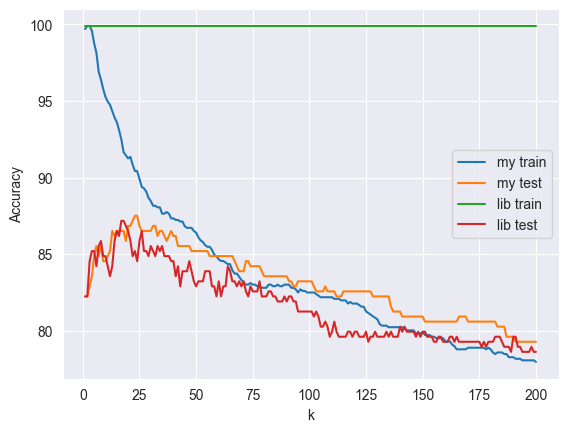

In [58]:

xs = [x for x in range(1, 201)]
ys_my_val, ys_my_test, ys_lib_val, ys_lib_test = [], [], [], []
for k in xs:
    ys_my_val.append(my_acc_dep_on_k(k, x_train, y_train))
    ys_my_test.append(my_acc_dep_on_k(k, x_test, y_test))
    ys_lib_val.append(lib_acc_dep_on_k(k, x_train, y_train))
    ys_lib_test.append(lib_acc_dep_on_k(k, x_test, y_test))

plt.plot(xs, ys_my_val, label='my train')
plt.plot(xs, ys_my_test, label='my test')
plt.plot(xs, ys_lib_val, label='lib train')
plt.plot(xs, ys_lib_test, label='lib test')
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [64]:
is_anomaly = []
anomalies = []

for id in range(len(x_train)):
    prediction = KNNClassifier(
        k=5,
        window_type='non_fixed',
        metric='manhattan',
        kernel='triangular')\
        .fit(x_train, y_train)\
        .predict(x_train.iloc[[id]])[0]
    is_anomaly.append(y_train[id] != prediction)
    anomalies.append(id)

In [65]:
def get_weights(w, anom_w):
    return [anom_w if is_anomaly[i] else w for i in range(len(is_anomaly))]

def get_acc(weights):
    preds = KNNClassifier(
        k=4,
        window_type='non_fixed',
        metric='manhattan',
        kernel='triangular'
    ).fit(x_train, y_train, weights).predict(x_test)
    return accuracy(preds, y_test)

print("Old accuracy: ", get_acc(None))
print("New accuracy: ", get_acc(get_weights(1, 0.1)))

Old accuracy:  83.55263157894737
New accuracy:  83.55263157894737


In [66]:
def get_lib_accuracy(x, y, x_t, y_t):
    lib_knn = KNeighborsClassifier(
        n_neighbors=24,
        weights='uniform',
        metric='manhattan',
        algorithm='ball_tree')
    predictions = lib_knn.fit(x, y).predict(x_t)
    return accuracy(y_t, predictions)


x_an, y_an = x_train.iloc[anomalies], pd.Series(y_train).iloc[anomalies]
x_train_sampled, y_train_sampled = pd.concat([x_train, x_an]), pd.concat([pd.Series(y_train), y_an])

print("Old accuracy", get_lib_accuracy(x_train, y_train, x_test, y_test))
print("New accuracy", get_lib_accuracy(x_train_sampled, y_train_sampled, x_test, y_test))


Old accuracy 83.22368421052632
New accuracy 83.55263157894737
